### model learnig
- ANN Classification model

In [1]:
import torch
from torch.utils.data import DataLoader

from torchinfo import summary

import dct_model_class_func as work

import pandas as pd

In [2]:
dct_df = pd.read_csv('dct_image.csv')
# dct_df = pd.read_csv('canny_edge_image.csv')
# dct_df = pd.read_csv('noise_log_edge_image.csv')
dct_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,animal
0,1470.750,33.712563,106.074532,-41.913597,1.500,-19.995213,10.452704,6.287269,1321.500,-142.070862,...,-0.227934,-1.803265,-1.970869,-1.948306,-1.716766,-1.435768,-1.082134,-1.065239,-0.620176,dog
1,1840.750,-152.634140,39.399494,130.114426,99.750,56.067768,48.082531,38.633945,1612.875,214.907654,...,2.388023,102.708588,-2.281470,-5.628395,1.712179,-2.876362,-2.061989,-5.563498,-1.939389,dog
2,1161.625,-44.065357,-9.642701,-8.198732,-0.125,-3.229434,-0.741328,-0.730558,1048.500,193.472916,...,-1.592703,-2.972577,1.446352,4.758355,5.642987,6.525692,2.426833,-7.455575,-0.725955,dog
3,1013.875,-49.820683,34.702354,29.419012,14.375,-7.067287,-0.167786,2.040232,1166.000,-26.172861,...,4.843615,6.487901,-11.056844,0.712732,4.323266,1.432525,-2.395761,2.103298,3.297103,dog
4,619.125,-0.008503,-9.761586,-12.016734,-4.875,2.697966,0.931503,0.080470,637.875,-11.938230,...,3.722195,-25.978338,-12.748701,-2.448924,-10.725556,11.036730,11.501582,0.251758,-3.179132,dog


In [3]:
dct_clf_model = work.DctMCModel()
dct_clf_ds = work.DctDataset(dct_df)

# print(dct_clf_model)
# summary(dct_clf_model, input_size=(10000, 1024))

In [4]:
# dataset, model, epochs, lr, batch, threshold
# dataset: dct_clf_ds
# model: dct_clf_model
# epochs: 100
# learning rate: 0.001
# batch: 32, 64
# threshold: 5
loss_dict, score_dict, proba_dict = work.training(dct_clf_ds, dct_clf_model, 100, 0.001, 64, 10)

saved first
[    5/  100]  [Train]         loss: 0.840738, score: 0.729474
[    5/  100]  [Validation]    loss: 2.869583, score: 0.663929
[   10/  100]  [Train]         loss: 0.173911, score: 0.811907
[   10/  100]  [Validation]    loss: 4.879378, score: 0.702912
[   15/  100]  [Train]         loss: 0.088491, score: 0.845929
[   15/  100]  [Validation]    loss: 5.421828, score: 0.711530
[   20/  100]  [Train]         loss: 0.063252, score: 0.852364
[   20/  100]  [Validation]    loss: 5.730510, score: 0.713870
[   25/  100]  [Train]         loss: 0.044506, score: 0.865668
[   25/  100]  [Validation]    loss: 6.074568, score: 0.722106
[   30/  100]  [Train]         loss: 0.042548, score: 0.872538
[   30/  100]  [Validation]    loss: 5.771004, score: 0.724731
[   35/  100]  [Train]         loss: 0.025668, score: 0.885854
[   35/  100]  [Validation]    loss: 6.371180, score: 0.734352
[   40/  100]  [Train]         loss: 0.033419, score: 0.884744
[   40/  100]  [Validation]    loss: 6.2313

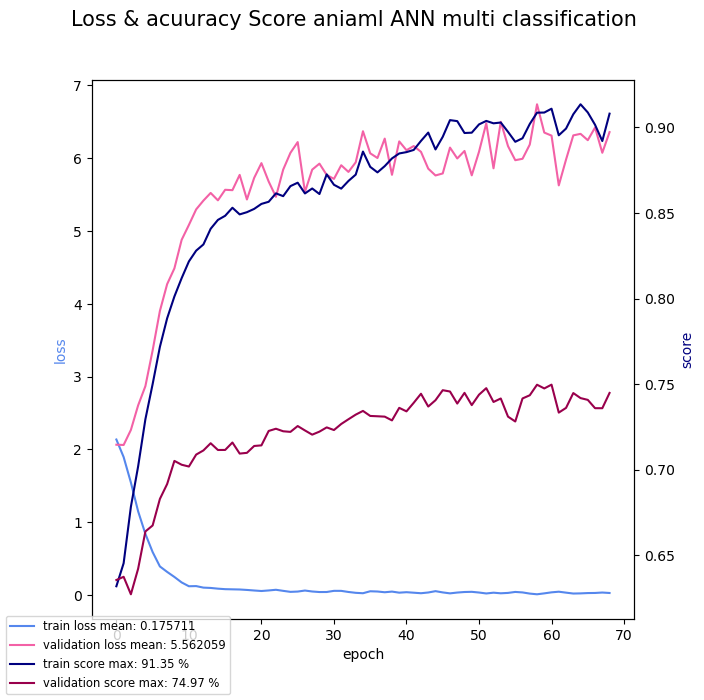

In [5]:
work.draw_two_plot(loss_dict, score_dict, 'Loss & acuuracy Score')

In [6]:
test_loss, test_score, test_pred = work.testing(dct_clf_model, dct_clf_ds.X_test_ts, dct_clf_ds.y_test_ts)

print(f"test loss value    : {test_loss.item():10.8f}")
print(f"test accuracy Score: {test_score.item()*100:.2f} %\n")

test loss value    : 6.13250065
test accuracy Score: 74.65 %



In [7]:
pred = work.predict(dct_clf_model, dct_clf_ds.X_test_ts[0])
pred

'spider'

In [8]:
animalDict = {0:'dog', 1:'horse', 2:'elephant', 3:'butterfly', 4:'chiken', 5:'cat', 6:'cow', 7:'sheep', 8:'spider', 9:'squirrel'}
cnt = 0
for i in range(10):
    if dct_clf_ds.y_test_ts[0][i] == 0:
        cnt += 1
    else: break
animalDict[cnt]

'spider'

In [9]:
dct_clf_ds.y_test_ts[4342]

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [10]:
pred = work.predict(dct_clf_model, dct_clf_ds.X_test_ts[4342])
cnt = 0
for i in range(10):
    if dct_clf_ds.y_test_ts[4342][i] == 0:
        cnt += 1
    else: break

print(pred, animalDict[cnt])

spider cow


In [2]:
#

In [11]:
save_param = './model/dct_multi_clf_params.pth'
save_model = './model/dct_multi_clf.pth'

torch.save(dct_clf_model.state_dict(), save_param)
torch.save(dct_clf_model, save_model)